In [69]:
import pandas as pd
import re
import numpy as np
import json
import torch
import os
import networkx as nx
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import time
from sklearn.metrics import pairwise_distances
import random
from torch_geometric.utils import to_networkx
import torch_geometric
import matplotlib.pyplot as plt

In [70]:
# Create graph

Graph_type_list = []

# Graph Type 1
type1 = []
edge_index = torch.tensor([[0,1,2,3,0,3,2,1],[1,2,3,0,3,2,1,0]], dtype=torch.long)
x = torch.tensor([[10],[20],[30],[40]], dtype=torch.float)
y = torch.tensor(0)
type1.append(Data(x=x, edge_index=edge_index, y=y))
edge_index = torch.tensor([[0,1,2,3,0,3,2,1],[1,2,3,0,3,2,1,0]], dtype=torch.long)
x = torch.tensor([[10],[20],[30],[40]], dtype=torch.float)
y = torch.tensor(1)
type1.append(Data(x=x, edge_index=edge_index, y=y))
Graph_type_list.append(type1)

# Graph Type 1
type2 = []
edge_index = torch.tensor([[0,2,1,3,0,1],[2,0,3,1,1,0]], dtype=torch.long)
x = torch.tensor([[1],[2],[3],[4]], dtype=torch.float)
y = torch.tensor(0)
type2.append(Data(x=x, edge_index=edge_index, y=y))
edge_index = torch.tensor([[0,2,1,3,0,1],[2,0,3,1,1,0]], dtype=torch.long)
x = torch.tensor([[1],[2],[3],[4]], dtype=torch.float)
y = torch.tensor(1)
type2.append(Data(x=x, edge_index=edge_index, y=y))
Graph_type_list.append(type2)

In [71]:
# Class to mix Data

class MixGraph:
    def __init__(self, list_of_graph):
        self.list_of_graph = list_of_graph
        assert len(list_of_graph) > 0
        self.num_graph = len(list_of_graph[0])
        for i in range(1, len(list_of_graph)):
            assert self.num_graph == len(list_of_graph[i])

    def mix_union(self)->list:
        ret_list = []
        for g in range(self.num_graph):
            list_of_edge = set()
            values = None
            y = self.list_of_graph[0][g].y
            for i in range(len(self.list_of_graph)):
                tmp = self.list_of_graph[i][g].edge_index.tolist()
                tmp1 = set([(tmp[0][e], tmp[1][e]) for e in range(len(tmp[0]))])
                list_of_edge = list_of_edge.union(tmp1)
                value_list_tmp = self.list_of_graph[i][g].x.tolist()
                if values:
                    values = [[values[i] + value_list_tmp[i]] for i in range(len(value_list_tmp))]
                else:
                    values = value_list_tmp

            edge_index = torch.tensor([[e[0] for e in list_of_edge],[e[1] for e in list_of_edge]], dtype=torch.long)
            x = torch.tensor(values, dtype=torch.float)
            ret_list.append(Data(x=x, edge_index=edge_index, y=y))
        return ret_list
    
    def mix_intersection(self)->list:
        ret_list = []
        for g in range(self.num_graph):
            list_of_edge = None
            values = None
            y = self.list_of_graph[0][g].y
            for i in range(len(self.list_of_graph)):
                tmp = self.list_of_graph[i][g].edge_index.tolist()
                tmp1 = set([(tmp[0][e], tmp[1][e]) for e in range(len(tmp[0]))])
                if list_of_edge:
                    list_of_edge = list_of_edge.intersection(tmp1)
                else:
                    list_of_edge = tmp1
                value_list_tmp = self.list_of_graph[i][g].x.tolist()
                if values:
                    values = [[values[i] + value_list_tmp[i]] for i in range(len(value_list_tmp))]
                else:
                    values = value_list_tmp

            edge_index = torch.tensor([[e[0] for e in list_of_edge],[e[1] for e in list_of_edge]], dtype=torch.long)
            x = torch.tensor(values, dtype=torch.float)
            ret_list.append(Data(x=x, edge_index=edge_index, y=y))
        return ret_list

            

In [72]:
def display_graph(list_of_graph):
    t_count = 1
    for t in list_of_graph:
        print(f"Graph type {t_count}")
        t_count += 1
        g_count = 1
        for g in t:
            print(f"Graph {g_count}")
            g_count += 1
            networkX_graph = to_networkx(g, to_undirected=True)
            nx.draw(networkX_graph, with_labels=True, font_weight='bold')
            plt.show()

def display_return(list_of_graph):
    t_count = 1
    for t in list_of_graph:
        print(f"Graph {t_count}")
        t_count += 1
        networkX_graph = to_networkx(t, to_undirected=True)
        nx.draw(networkX_graph, with_labels=True, font_weight='bold')
        plt.show()

BEFORE
Graph type 1
Graph 1


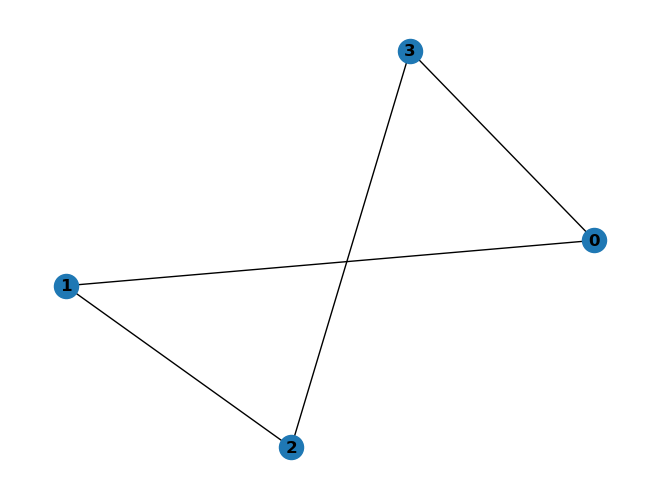

Graph 2


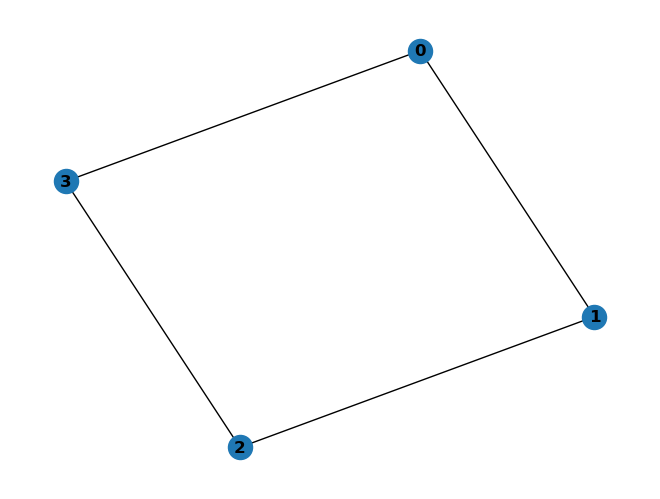

Graph type 2
Graph 1


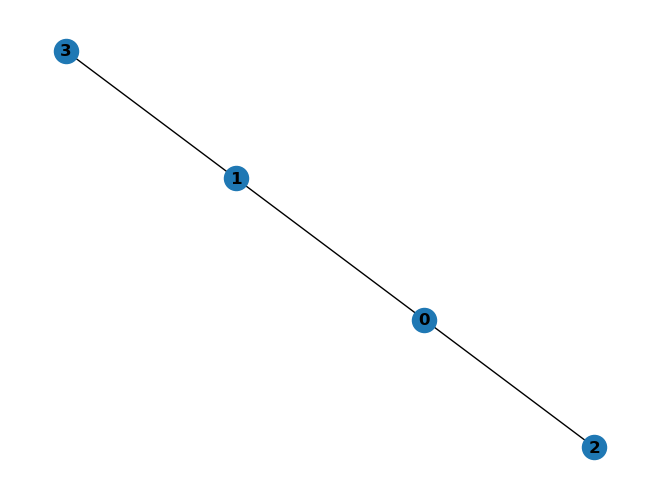

Graph 2


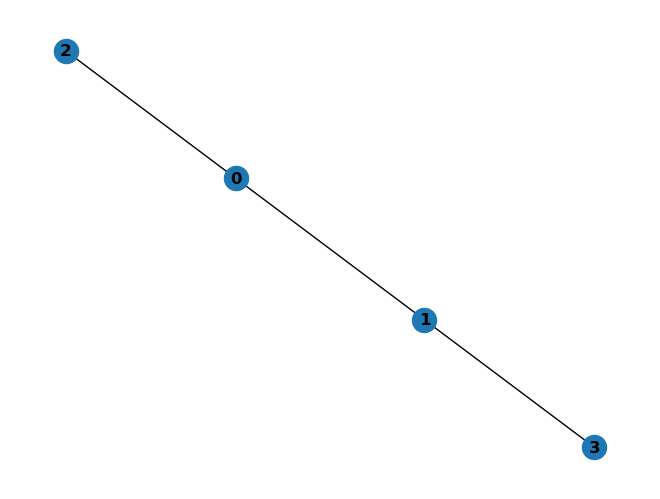

RETURN UNION
Graph 1


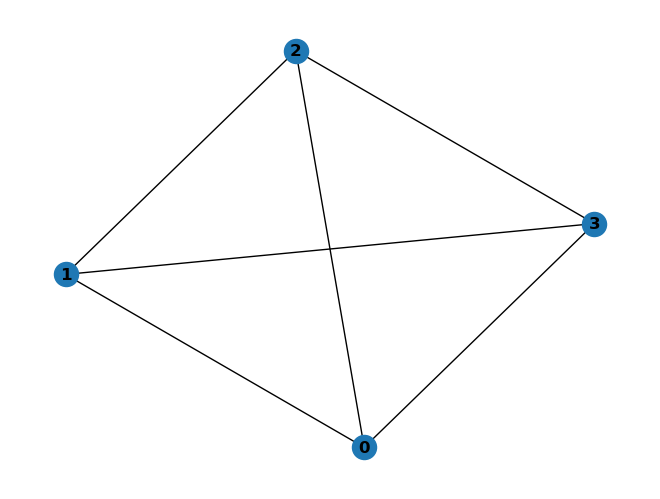

Graph 2


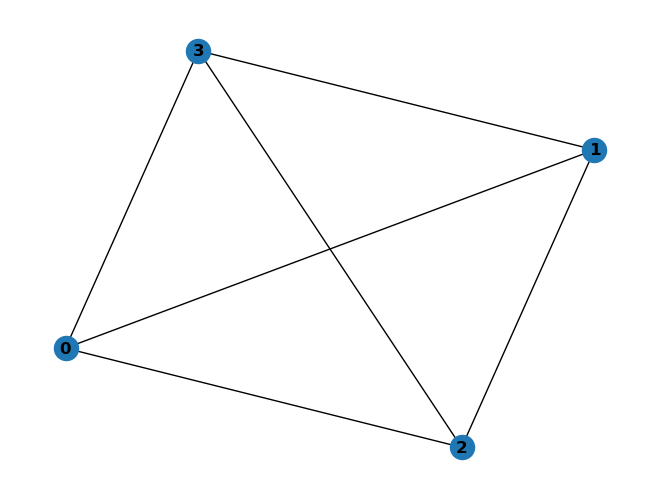

RETURN INTERSECTION
Graph 1


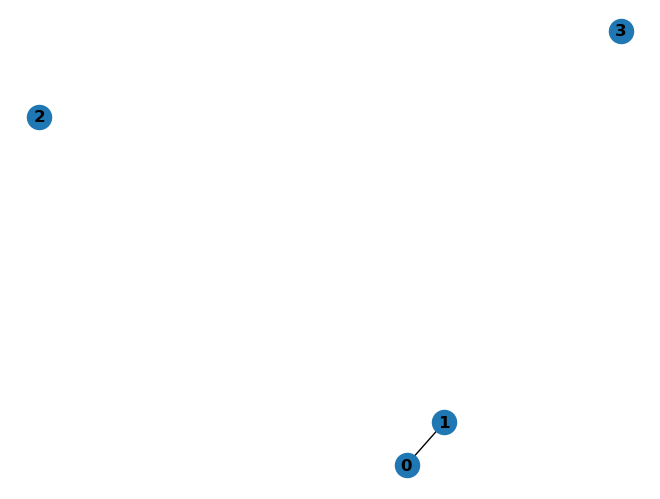

Graph 2


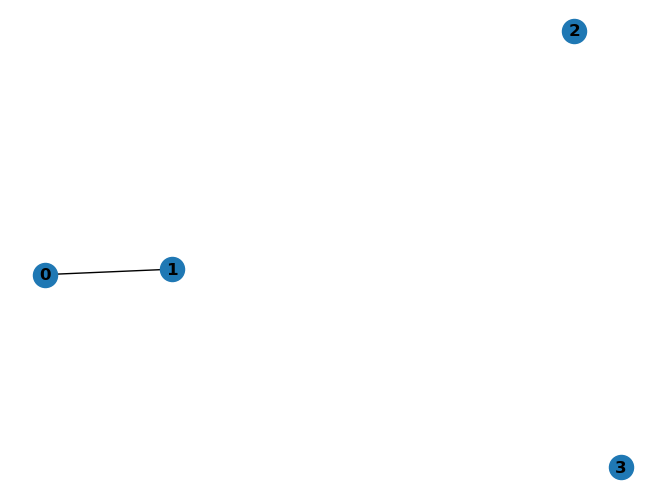

In [73]:
# Show graph before
print("BEFORE")
display_graph(Graph_type_list)

# Union
ret = MixGraph(Graph_type_list).mix_union()
print("RETURN UNION")
display_return(ret)

# Intersection
ret = MixGraph(Graph_type_list).mix_intersection()
print("RETURN INTERSECTION")
display_return(ret)